In [1]:
import os
import gc
import torch
import random
import datetime
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/tmp/user/1000/ipykernel_63598/921126703.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
purchase_df = pd.read_csv('../data/purchase.csv')
boxes_df = pd.read_csv('../data/boxes.csv')

In [3]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [4]:
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [5]:
purchase_df.sample(10)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1756211,30/11/2018,2C04F9472C8,134.0,1.0,60
118706,6/2/2019,28DAE3B431A,246.0,1.0,128
517168,26/2/2019,2BC624487F3,144.0,1.0,148
1957736,5/11/2018,28D3B9C3C74,237.0,1.0,35
2440055,28/10/2018,2CE24E86761,143.0,1.0,27
2205154,17/10/2018,2CE0774F199,143.0,1.0,16
194441,10/2/2019,2BDA482F95D,142.0,1.0,132
2069798,2/10/2018,2BDDF44DF92,163.0,1.0,1
1630111,25/11/2018,29768DCBCA1,271.0,1.0,55
848289,15/1/2019,2CF41C6F7CA,106.0,1.0,106


In [6]:
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [7]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [8]:
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [9]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [10]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1317097,2CE55910930,103,1,73
1997981,2C671992EFF,137,1,2
112386,2C1C2D84A2A,103,1,128
609138,2C82DF45918,78,1,93
1533417,2C1CB077617,41,1,91
1428602,2BE869459E6,103,1,84
1278451,2CDBCADB0B3,4,1,72
375159,2949C2B6B4D,272,1,141
1170675,2C25FB661CC,163,1,64
2232569,2C3BEF7AC4E,134,1,19


In [11]:
len(purchase_df['MAGIC_KEY'].unique())

1274087

In [12]:
len(purchase_df)

2455800

In [13]:
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [14]:
prob2_df =pd.read_csv('../data/problem 2.csv')
prob2_df.head()

,MAGIC_KEY
0,2C0B5F97180
1,2C2F659EF00
2,29D629EDF20
3,2A7073E2FF0
4,2A9B9BE1210


In [15]:
len(prob2_df)

43518

In [16]:
prob2_customers = [customer_ids[x] for x in prob2_df['MAGIC_KEY'].unique()]
len(prob2_customers)

43518

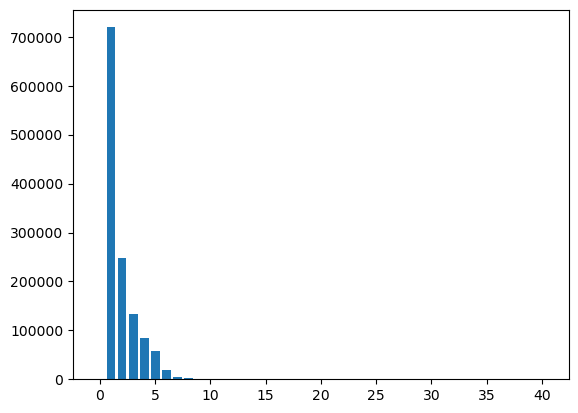

In [17]:

purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

#generate bar plot from purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [18]:
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [19]:
a = 10
b = 10
print("single purchase: ")
for i, p in enumerate(purchases):
    if len(p) == 1:
        if a > 0:
            print(i, p)
            a -= 1

print("more than 5 purchase: ")
for i, p in enumerate(purchases):
    if len(p) > 5:
        if b > 0:
            print(i, p)
            b -= 1


single purchase: 
0 [(12, 1, 123)]
1 [(12, 1, 123)]
3 [(6, 1, 123)]
4 [(4, 1, 123)]
6 [(227, 1, 123)]
7 [(6, 1, 123)]
10 [(12, 1, 123)]
11 [(231, 1, 123)]
13 [(278, 1, 123)]
16 [(231, 1, 123)]
more than 5 purchase: 
5 [(238, 1, 14), (238, 1, 36), (238, 1, 56), (238, 1, 80), (238, 1, 100), (238, 1, 123)]
14 [(203, 1, 35), (203, 1, 53), (203, 1, 63), (221, 1, 72), (203, 1, 81), (203, 1, 87), (238, 1, 97), (204, 1, 123), (204, 1, 135), (272, 1, 150)]
38 [(8, 1, 15), (8, 1, 30), (8, 1, 60), (8, 1, 82), (8, 1, 104), (8, 1, 123)]
39 [(238, 1, 20), (238, 1, 44), (268, 1, 54), (238, 1, 67), (238, 1, 76), (238, 1, 89), (238, 1, 98), (238, 1, 105), (228, 1, 123), (238, 1, 129), (238, 1, 133), (238, 1, 138), (238, 1, 142), (230, 1, 147), (238, 1, 150)]
42 [(260, 1, 8), (203, 1, 23), (221, 1, 38), (221, 1, 65), (271, 1, 84), (272, 1, 104), (221, 1, 123), (276, 1, 145)]
43 [(137, 1, 6), (137, 1, 23), (137, 1, 42), (137, 1, 62), (137, 1, 79), (174, 1, 97), (174, 1, 123)]
44 [(238, 1, 18), (238, 1, 1

In [20]:
boxes_df[109:111]

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
109,110,Premium,Delivery from Collection Point,0.0,4.4,15.96
110,111,Premium,Delivery from Collection Point,0.0,4.7,15.96


In [21]:
len(boxes_df)

290

In [22]:
def meat_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    meat_consumed = 0
    for id, cnt, _ in boxes:
        meat_consumed += cnt * boxes_df.at[id - 1, 'MEAT']
    return meat_consumed

def meat_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    if start < end_day:
        return meat_consumed(cid, start, end_day) / (end_day - start)
    else:
        return 0

In [23]:
def milk_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    milk_consumed = 0
    for id, cnt, _ in boxes:
        milk_consumed += cnt * boxes_df.at[id - 1, 'MILK']
    return milk_consumed

def milk_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    if start < end_day:
        return milk_consumed(cid, start, end_day) / (end_day - start)
    else:
        return 0

In [24]:
def box_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    box_ids = []
    for id, _ , _ in boxes:
        box_ids.append(id)
    return box_ids

In [25]:
last_day = purchase_df['day'].max()
last_day

150

In [26]:
last_date = datetime.date(2019, 2, 28)
(last_date - base_date).days

150

In [27]:
first_day = purchase_df['day'].min()
first_day

0

In [28]:
print(meat_consumption_rate(0))
print(milk_consumption_rate(0))
print(purchases[0])

0.05357142857142857
0.2857142857142857
[(12, 1, 123)]


In [29]:
def last_meat_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MEAT'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return [0, 150]
    return [cnt * boxes_df.at[bid - 1, 'MEAT'], 
            end_day - day]

last_meat_consumption(3588, 150)

[4.4, 27]

In [30]:
def last_milk_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MILK'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return [0, 150]
    return [cnt * boxes_df.at[bid - 1, 'MILK'], 
            end_day - day]

print(last_milk_consumption(3500, 150))

[8.0, 27]


In [31]:
def box_freq(cid, end_day):
    consumptions = list(filter(lambda x: x[2] < end_day, purchases[cid]))
    freq = [0 for _ in range(290)]
    for i in range(len(consumptions)):
        bid, _, _ = consumptions[i]
        freq[bid-1] += 1
    return freq

In [32]:
val_day = 120

def filter_val_idx(val_idx):
    filtered_val_idx = []
    for cid in val_idx:
        if len(purchases[cid]) < 2:
            continue
        consumed_box_ids = box_consumed(cid, val_day, val_day+15)
        if len(consumed_box_ids) != 1:
            continue
        filtered_val_idx.append(cid)
    return filtered_val_idx

In [33]:
split = int(len(purchases) * 0.1)
idx = [i for i in range(len(purchases))]

random.shuffle(idx)
val_idx = idx[:split]
val_idx = filter_val_idx(val_idx)
train_idx = idx[split:]

def generate_batch(day, batch_size, split='train'):
    batch = []
    labels = []
    n = 0
    current_idx = []
    if split == 'train':
        random.shuffle(train_idx)
        current_idx = train_idx
    else:
        random.shuffle(val_idx)
        current_idx = val_idx
    for cid in current_idx:
        if len(purchases[cid]) < 2:
            continue
        consumed_box_ids = box_consumed(cid, day, day+15)
        if len(consumed_box_ids) != 1:
            continue
        meat_rate = meat_consumption_rate(cid, day)
        milk_rate = milk_consumption_rate(cid, day)
        last_meat = last_meat_consumption(cid, day)
        last_milk = last_milk_consumption(cid, day)

        features = [meat_rate, milk_rate]
        features.extend(last_meat)
        features.extend(last_milk)
        features.extend(box_freq(cid, day))


        batch.append(features)
        labels.append(consumed_box_ids[0] - 1) # for mapping 1-290 to 0-289
        n += 1
        if split=='train' and n == batch_size:
            return batch, labels
    if split == 'train':
        return None, None
    else:
        return batch, labels

batch, labels = generate_batch(val_day, len(val_idx), 'val')
print(split)
print(len(batch))

127410
18756


In [34]:

class BoxPredictor(torch.nn.Module):
    def __init__(self):
        super(BoxPredictor, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(296, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 290)  # Change the final layer to have 290 output neurons
        )

    def forward(self, x):
        return self.mlp(x)  # Removed reshape since we now handle classification

In [35]:
torch.cuda.empty_cache()
gc.collect()

# Assuming the model and generate_batch functions are defined correctly
model = BoxPredictor()  # Ensure the model is defined
if torch.cuda.is_available():
    model.cuda()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_accuracy = 0  # Track best accuracy instead of loss for model selection
batch_size = 256
epochs = 0
model_save_dir = '../models/'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# Preparing validation data
val, val_labels = generate_batch(val_day, len(val_idx), 'val')
val = torch.tensor(val, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.long)  # Labels should be long for CrossEntropyLoss
if torch.cuda.is_available():
    val = val.cuda()
    val_labels = val_labels.cuda()

for epoch in range(epochs):
    batch, labels = generate_batch(random.randint(70, 136), batch_size, 'train')
    if batch is None or labels is None:
        continue
    batch = torch.tensor(batch, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)  # Labels should be long for CrossEntropyLoss
    if torch.cuda.is_available():
        batch = batch.cuda()
        labels = labels.cuda()

    optimizer.zero_grad()
    outputs = model(batch)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    # Printing training loss more frequently
    if epoch % 2 == 0:
        print(f"Epoch {epoch} | Training loss: {loss.item()}")

    # Validation check
    if epoch % 5 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(val)
            val_loss = loss_fn(val_outputs, val_labels)
            # Calculate validation accuracy
            _, predicted = torch.max(val_outputs, 1)
            correct = (predicted == val_labels).sum().item()
            total = val_labels.size(0)
            accuracy = correct / total
            print(f"\nEpoch {epoch} | Validation loss: {val_loss.item()}, Accuracy: {accuracy}\n")

            # Save the best model based on accuracy
            if accuracy > best_accuracy:
                torch.save(model.state_dict(), f'{model_save_dir}box_predictor.pth')
                best_accuracy = accuracy
                print(f"Best model updated with accuracy: {accuracy}")

        model.train()


/home/brainiac77/miniconda3/envs/vision-1/lib/python3.12/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [36]:
model.load_state_dict(torch.load(f'{model_save_dir}box_predictor-0.560244.pth'))

<All keys matched successfully>

In [39]:
def predict(cid, day):
    model.eval()  # Ensure the model is in evaluation mode
    meat_rate = meat_consumption_rate(cid, day)
    milk_rate = milk_consumption_rate(cid, day)
    last_meat = last_meat_consumption(cid, day)
    last_milk = last_milk_consumption(cid, day)
    features = [meat_rate, milk_rate]
    features.extend(last_meat)
    features.extend(last_milk)
    features.extend(box_freq(cid, day))
    batch = [features]
    batch = torch.tensor(batch, dtype=torch.float32)
    
    if torch.cuda.is_available():
        batch = batch.cuda()  # Move batch to GPU if CUDA is available
    
    with torch.no_grad():  # Turn off gradients for prediction to save memory and computations
        outputs = model(batch)
        _, predicted_indices = torch.max(outputs, 1)  # Get the index of the max logit
    
    predicted_box_id = predicted_indices.item()  # Convert tensor to integer
    predicted_box_id += 1 # mapping box id 0-289 to 1-290
    return predicted_box_id

In [40]:
data = []
for cid in prob2_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'BOX_ID': predict(cid, 151)
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY', 'BOX_ID'])
sub_df.to_csv('../submissions/submission-2.csv', index=False)